In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import random as rd
import math
import altair as alt

In [2]:
results_rws_mhrw = pd.read_csv('presentation_results/ml_mhrw_rws.csv')
results_rws_sb = pd.read_csv('presentation_results/ml_sb_rws.csv')

In [3]:
rws_mhrw = pd.DataFrame()
rws_mhrw['train'] = results_rws_mhrw['train_type'] + ' ' + results_rws_mhrw['train_size'].astype(str)
rws_mhrw['test'] = results_rws_mhrw['test_type'] + ' ' + results_rws_mhrw['test_size'].astype(str)
rws_mhrw['train_gini'] = np.round(results_rws_mhrw['train_gini'], 2)
rws_mhrw['test_gini'] = np.round(results_rws_mhrw['test_gini'], 2)

In [4]:
rws_mhrw

,train,test,train_gini,test_gini
0,BA 30,BA 75,0.47,0.86
1,BA 30,BA 120,0.47,0.94
2,BA 30,ER 30,0.47,0.02
3,BA 30,ER 75,0.47,0.02
4,BA 30,ER 120,0.47,0.01
...,...,...,...,...
127,Maier 120,SW 30,0.91,0.01
128,Maier 120,SW 75,0.91,0.05
129,Maier 120,SW 120,0.91,0.01
130,Maier 120,Maier 30,0.91,0.20


In [5]:
G = nx.from_pandas_edgelist(rws_mhrw, source='train', target='test', edge_attr=True, create_using=nx.DiGraph())

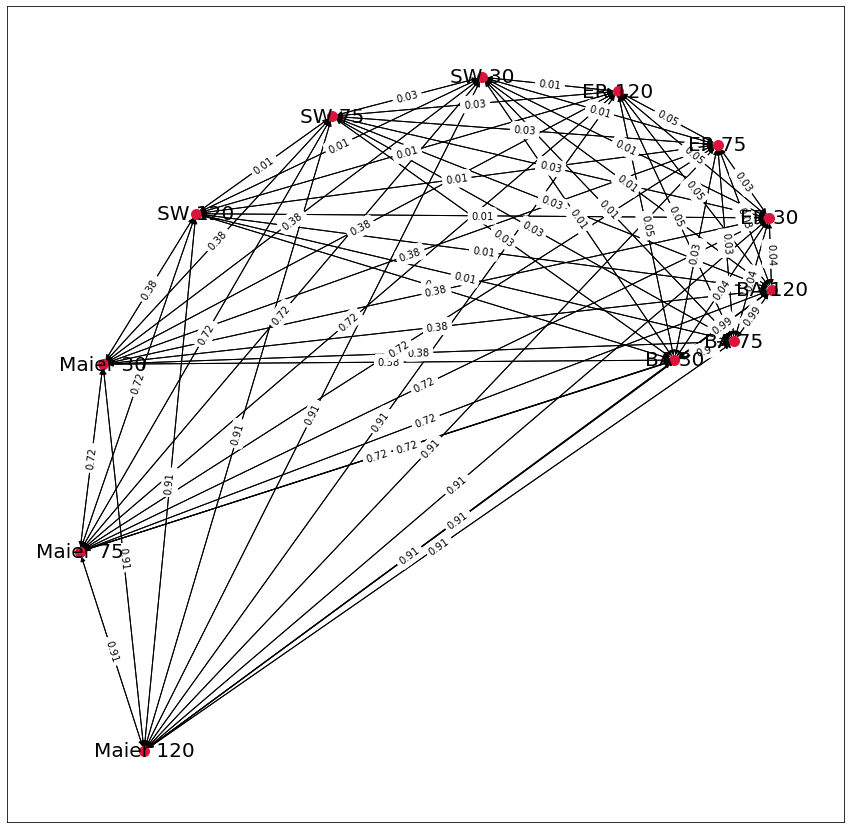

In [6]:
# pos=nx.spectral_layout(G, weight='train_gini')
pos=nx.spiral_layout(G)
plt.figure(figsize=(15,15))
nx.draw_networkx(G, node_size=100, with_labels=True, font_size=20, pos=pos, node_color='crimson', edge_color ='k') 
nx.draw_networkx_edge_labels(G,pos,edge_labels=nx.get_edge_attributes(G,'train_gini'))
plt.show()

In [7]:
rws_mhrw = results_rws_mhrw[['train_type', 'train_size', 'train_gini', 'test_gini']].groupby(by=['train_type', 'train_size']).agg(["mean", "var"]).reset_index()
rws_mhrw

train_type train_size train_gini      test_gini          
                               mean  var      mean       var
0          BA         30   0.467525  0.0  0.257609  0.125635
1          BA         75   0.901189  0.0  0.201761  0.073346
2          BA        120   0.990065  0.0  0.223617  0.092298
3          ER         30   0.037512  0.0  0.158193  0.035192
4          ER         75   0.027481  0.0  0.075291  0.007663
5          ER        120   0.050499  0.0  0.153762  0.032938
6       Maier         30   0.378011  0.0  0.159912  0.046387
7       Maier         75   0.720559  0.0  0.168828  0.065618
8       Maier        120   0.913185  0.0  0.256326  0.109958
9          SW         30   0.005100  0.0  0.129903  0.030329
10         SW         75   0.025820  0.0  0.093234  0.012876
11         SW        120   0.013587  0.0  0.192836  0.036311

In [8]:
print(rws_mhrw.to_latex())

\begin{tabular}{llrrrrr}
\toprule
{} & train\_type & train\_size & \multicolumn{2}{l}{train\_gini} & \multicolumn{2}{l}{test\_gini} \\
{} &       mean &  var &      mean &       var \\
\midrule
0  &         BA &         30 &   0.467525 &  0.0 &  0.257609 &  0.125635 \\
1  &         BA &         75 &   0.901189 &  0.0 &  0.201761 &  0.073346 \\
2  &         BA &        120 &   0.990065 &  0.0 &  0.223617 &  0.092298 \\
3  &         ER &         30 &   0.037512 &  0.0 &  0.158193 &  0.035192 \\
4  &         ER &         75 &   0.027481 &  0.0 &  0.075291 &  0.007663 \\
5  &         ER &        120 &   0.050499 &  0.0 &  0.153762 &  0.032938 \\
6  &      Maier &         30 &   0.378011 &  0.0 &  0.159912 &  0.046387 \\
7  &      Maier &         75 &   0.720559 &  0.0 &  0.168828 &  0.065618 \\
8  &      Maier &        120 &   0.913185 &  0.0 &  0.256326 &  0.109958 \\
9  &         SW &         30 &   0.005100 &  0.0 &  0.129903 &  0.030329 \\
10 &         SW &         75 &   0.025820 &  0

In [9]:
rws_sb = results_rws_sb[['train_type', 'train_size', 'train_gini', 'test_gini']].groupby(by=['train_type', 'train_size']).agg(["mean", "var"]).reset_index()
rws_sb

train_type train_size train_gini      test_gini              
                               mean  var      mean           var
0          BA         30        1.0  0.0  0.999944  2.501821e-08
1          BA         75        1.0  0.0  1.000000  1.232595e-32
2          BA        120        1.0  0.0  0.999979  4.687574e-09
3          ER         30        1.0  0.0  0.982504  1.697437e-03
4          ER         75        1.0  0.0  0.998715  1.197802e-05
5          ER        120        1.0  0.0  0.998770  6.813951e-06
6       Maier         30        1.0  0.0  1.000000  1.327476e-12
7       Maier         75        1.0  0.0  0.998918  5.808909e-06
8       Maier        120        1.0  0.0  0.999858  1.891523e-07
9          SW         30        1.0  0.0  0.999782  2.195901e-07
10         SW         75        1.0  0.0  0.999358  3.546537e-06
11         SW        120        1.0  0.0  0.999957  8.426382e-09

In [10]:
print(rws_sb.to_latex())

\begin{tabular}{llrrrrr}
\toprule
{} & train\_type & train\_size & \multicolumn{2}{l}{train\_gini} & \multicolumn{2}{l}{test\_gini} \\
{} &       mean &  var &      mean &           var \\
\midrule
0  &         BA &         30 &        1.0 &  0.0 &  0.999944 &  2.501821e-08 \\
1  &         BA &         75 &        1.0 &  0.0 &  1.000000 &  1.232595e-32 \\
2  &         BA &        120 &        1.0 &  0.0 &  0.999979 &  4.687574e-09 \\
3  &         ER &         30 &        1.0 &  0.0 &  0.982504 &  1.697437e-03 \\
4  &         ER &         75 &        1.0 &  0.0 &  0.998715 &  1.197802e-05 \\
5  &         ER &        120 &        1.0 &  0.0 &  0.998770 &  6.813951e-06 \\
6  &      Maier &         30 &        1.0 &  0.0 &  1.000000 &  1.327476e-12 \\
7  &      Maier &         75 &        1.0 &  0.0 &  0.998918 &  5.808909e-06 \\
8  &      Maier &        120 &        1.0 &  0.0 &  0.999858 &  1.891523e-07 \\
9  &         SW &         30 &        1.0 &  0.0 &  0.999782 &  2.195901e-07 \\
10